# Singular value decomposition (SVD)

The singular value decompostion of a real-valued $m \times n$ matrix $\boldsymbol{A}$ is:

$$
\boldsymbol{A} = \boldsymbol{U} \boldsymbol{\Sigma} \boldsymbol{V}^{T}
$$

where

- $\boldsymbol{U}$ is an $m \times m$ orthogonal matrix;
- $\boldsymbol{\Sigma}$ is an $m \times n$ diagonal matrix with diagonal entries $\sigma_{1} \ge  \sigma_{2} \ge \ldots \ge \sigma_{p} \ge 0$, where $p = \min(m, n)$; and
- $\boldsymbol{U}$ is an $n \times n$ orthogonal matrix.

We will use NumPy to compute the SVD and Matplotlib to visualise results, so we first import some modules:

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

**Note:** If you run this notebook yourself it can take sometime because it computes number of moderate size SVD problems.

## Low rank approximations

Recall that we can represent a matrix as a sum of rank-1 matrices:

$$
\boldsymbol{A} = \sum_{i} \sigma_{i} \boldsymbol{u}_{i} \boldsymbol{v}^{T}_{i}
$$

where $\sigma_{i}$ is the $i$th singular value and $\boldsymbol{u}_{i}$ and $\boldsymbol{v}_{i}$ are the $i$th columns vectors of $\boldsymbol{U}$ and $\boldsymbol{V}$, respectively from the SVD. Clearly, for any $\sigma_{i} = 0$ we can avoid storing the data that makes no contribution. If $\sigma_{i}$ is small, then the contribution of $\boldsymbol{u}_{i} \boldsymbol{v}^{T}_{i}$ is small and we discard it and introduce only a small 'error' to the matrix. We will use low rank approximations in a number of examples in this notebook.

## Data compression

We start with a $100 \times 200$ matrix that has entries equal to one or zero. We create a matrix with all entries set to zero, and we then set some entries equal to one in the pattern of rectangle.

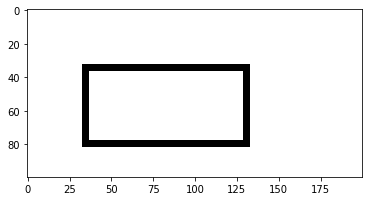

In [2]:
A = np.ones((100, 200))
A[33:33 + 4, 33:133] = 0.0
A[78:78 + 4, 33:133] = 0.0
A[33:78+4, 33:33+4] = 0.0
A[33:78+4, 129:129+4] = 0.0
plt.imshow(A, cmap='gray', interpolation='none')
plt.show()

Performing the SVD and counting the number of singular values that are greater than $10^{-9}$:

In [3]:
U, s, V = np.linalg.svd(A, full_matrices=False)
print("Number of singular values greater than 1.0e-9: {}".format((s > 1.0e-9).sum()))

Number of singular values greater than 1.0e-9: 3


With only three nonzero singular values, we could reconstruct the matrix with very little data - just three singular values and six vectors.

### Removing noise

We consider the same matrix problem again, this time with some back ground noise in the white regions.

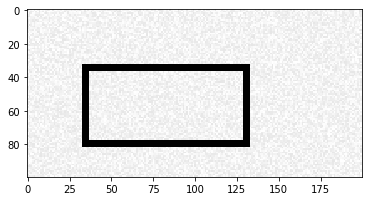

In [4]:
A = np.ones((100, 200))
A = A - 1.0e-1*np.random.rand(100, 200)
A[33:33 + 4, 33:133] = 0.0
A[78:78 + 4, 33:133] = 0.0
A[33:78+4, 33:33+4] = 0.0
A[33:78+4, 129:129+4] = 0.0
plt.imshow(A, cmap='gray', interpolation='none');  

The effect of the noise is clear in the image.

We can try to eliminate much of the background noise via a low-rank approximation of the noisy image that discards information associated with small singular values of the matrix.

In [5]:
# Compute SVD of nois matrix
U, s, V = np.linalg.svd(A, full_matrices=False)

# Set any singular values less than 1.0 equation zero
s[s < 1.0] = 0.0

# Reconstruct low rank approximation and display
A_denoised = np.dot(U, np.dot(np.diag(s), V))
plt.imshow(A_denoised, cmap='gray', interpolation='none')
plt.show();

We can see that much of the noise in the image has been eliminated.

## Image compression

### Gray scale image

We load a colour PNG file. It uses three colour channels (red/green/blue), with at each pixel an 8-bit unsigned integer (in the range $[0, 255]$, but sometimes represented as a float) for each colour for the colour intensity. This is know as 24-bit colour - three channels times 8 bit.

We load the image as three matrices (red, green, blue), each with dimension equal to the number pixels in each direction: 

In [6]:
img_colour = Image.open("./photo/IMG_20190117_141143059.png")
print("Image size (pixels):", img_colour.size)
print("Image array shape:  ", np.array(img_colour).shape)

plt.figure(figsize=(15, 15/1.77))
plt.imshow(img_colour);

Image size (pixels): (1629, 2952)
Image array shape:   (2952, 1629, 3)


We could work with the colour image, but it is simpler to work with a gray scale image because then we have only one value for the colour intensity at each pixel rather than three (red/green/blue).

In [7]:
img_bw = img_colour.convert('L')

plt.figure(figsize=(15, 15/1.77))
plt.imshow(img_bw, cmap='gray');      
print("Image array shape: {}".format(img_bw.size))

plt.savefig("bw.pdf")

Image array shape: (1629, 2952)


We can convert the image to a regular matrix with values between 0 and 255, with each entry corresponding to a pixel in the image. Creating the matrix and inspecting first four rows and three columns (top left corner of the image):

In [8]:
img_array = np.array(img_bw)
print("Image shape:", img_array.shape)
print(img_array[:4, :3])

Image shape: (2952, 1629)
[[117 117 117]
 [118 117 118]
 [118 115 117]
 [118 114 116]]


Now, maybe we can discard information associated with small singular values without perceiving any visual change in the image. To explore this, we compute the SVD of the gray scale image:

In [9]:
U, s, V = np.linalg.svd(img_array, full_matrices=False)

The argument `full_matrices=False` tells NumPy to not store all the redundant zero terms in the $\boldsymbol{\Sigma}$ array. This is the normal approach in practice, but not in most text books. Note that NumPy return the singular values as a one-dimendional array, not as a matrix.

We now print the largest and smallest singular values, and plot all the singular values $\sigma_{i}$ on a log-scale:

Number of singular values: 1629
Max, min singular values: 207152.29853204382, 10.506985912010627


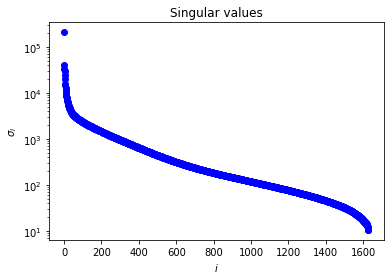

In [10]:
print("Number of singular values: {}".format(len(s)))
print("Max, min singular values: {}, {}".format(s[0], s[-1]))

plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')
plt.title('Singular values')
plt.yscale('log')
plt.plot(s, 'bo');

plt.savefig("bw-svd.pdf")

We can now try compressing the image. We first try retaining using only the largest 25% of values: 

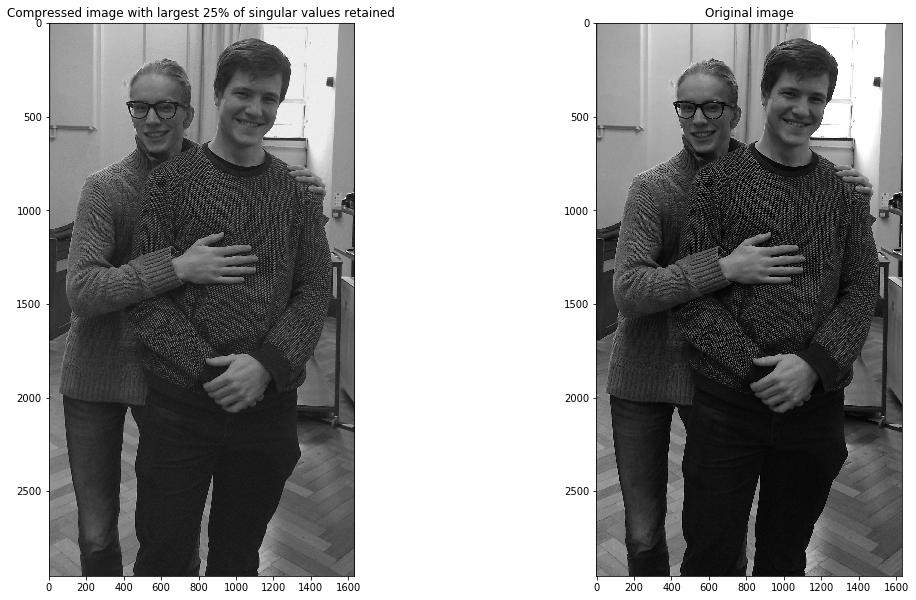

In [11]:
# Compute num_sigma/4 (25%) and zero values 
r = int(0.25*len(s)) 

# Re-construct low rank approximation (this may look a little cryptic, but we use the below 
# expression to avoid unecessary computation)
compressed = U[:,:r].dot(s[:r, np.newaxis]*V[:r,:])
compressed = compressed.astype(int)

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 18/1.77));
axes[0].set_title('Compressed image with largest 25% of singular values retained')
axes[0].imshow(compressed, cmap='gray');
axes[1].set_title('Original image')
axes[1].imshow(img_array, cmap='gray');

We have discarded 3/4 of the singular values, but can  barely perceive a difference in the image.

To explore other levels of compression, we write a function that takes the fraction of singular values we wish to retain:

In [12]:
def compress_image(U, s, V, f):
    "Compress image where 0 < f <= 1 is the fraction on singular values to retain"
    r = int(f*len(s))
    return (U[:,:r].dot(s[:r, np.newaxis]*V[:r,:])).astype(int)

Let's try retaining just 10% of the singular values:

In [13]:
# Compress image/matrix
compressed = compress_image(U, s, V, 0.1)

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Compressed image with largest 10% of singular values retained')
axes[0].imshow(compressed, cmap='gray');
axes[1].set_title('Original image')
axes[1].imshow(img_array, cmap='gray');

plt.savefig("bw-0-10.pdf")

Even with only 5% if the singular values retains, it is hard to perceive a difference between the images. Next we try keeping only 2%: 

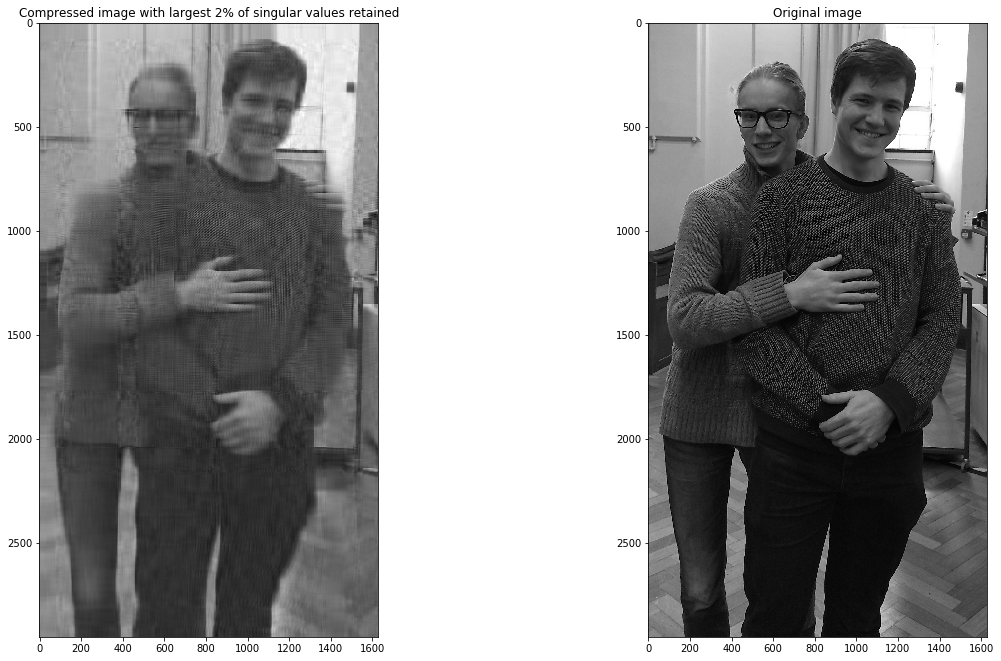

In [14]:
# Compress image/matrix
compressed = compress_image(U, s, V, 0.02)

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Compressed image with largest 2% of singular values retained')
axes[0].imshow(compressed, cmap='gray');
axes[1].set_title('Original image')
axes[1].imshow(img_array, cmap='gray');

plt.savefig("bw-0-02.pdf")

We now see some image clear degradation, but the image is sill recognisable. We'll try one more case where we retain only 0.5% of the singular values. 

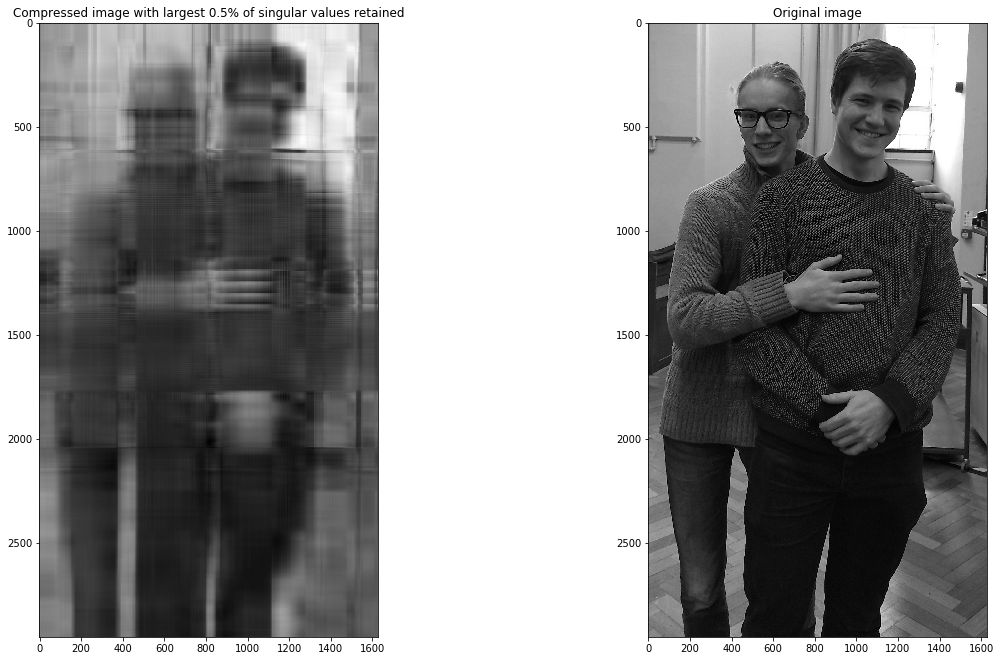

In [15]:
# Compress image/matrix
compressed = compress_image(U, s, V, 0.005)

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Compressed image with largest 0.5% of singular values retained')
axes[0].imshow(compressed, cmap='gray');
axes[1].set_title('Original image')
axes[1].imshow(img_array, cmap='gray');

plt.savefig("bw-0-005.pdf")

The image quality is now quite poor.

### Colour image: RGB

We'll now try compressing a colour image.

Image array shape: (1888, 2368)


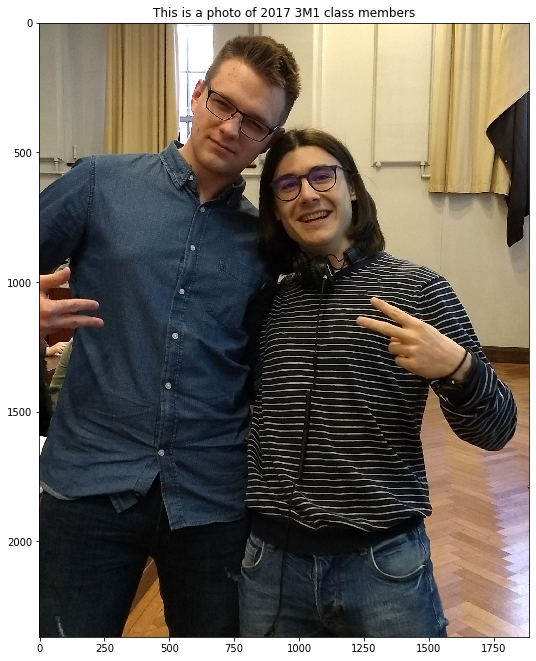

In [16]:
img_colour = Image.open('./photo/IMG_20190117_141222563.png')
print("Image array shape: {}".format(img_colour.size))

plt.figure(figsize=(20,20/1.77))
plt.title('This is a photo of 2017 3M1 class members')
plt.imshow(img_colour);

We can extract the red, green and blue components to have a look:

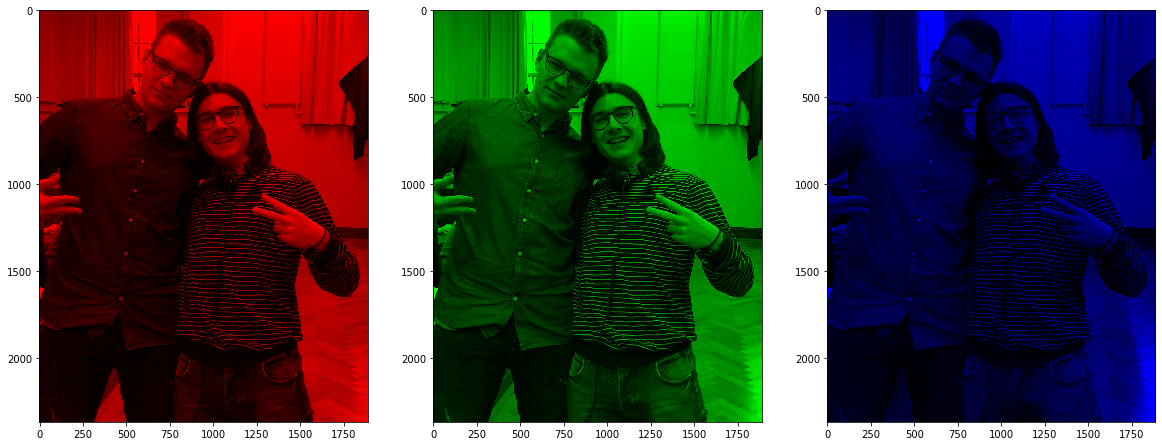

In [17]:
img_colour = Image.open('./photo/IMG_20190117_141222563.png')

# Display red, green and blue channels by zeroing other channels
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20/1.77))
img_array = np.array(img_colour)

# Zero the g/b channels
red = img_array.copy()
red[:,:,(1,2)] = 0.0
axes[0].imshow(red);

# Zero the r/b channels
green = img_array.copy()
green[:,:,(0,2)] = 0.0
axes[1].imshow(green);

# Zero the r/g channels
blue = img_array.copy()
blue[:,:,(0,1)] = 0.0
axes[2].imshow(blue);

We now compute an SVD for the matrix of each colour:

In [18]:
# Compute SVD for each colour
U, s, V = [0]*3, [0]*3, [0]*3
for i in range(3):
    U[i], s[i], V[i] = np.linalg.svd(img_array[:, :, i], full_matrices=False)

Compressing the matrix for each colouring separately and then reconstructing the three-dimensional array:

In [19]:
# Compress each colour separately
compressed = [compress_image(U[i], s[i], V[i], 0.15) for i in range(3)]

# Reconstruct 3D RGB array and filter any values outside of (0, 1)
compressed = np.dstack(compressed)

Comparing the compressed and original images side-by-side:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


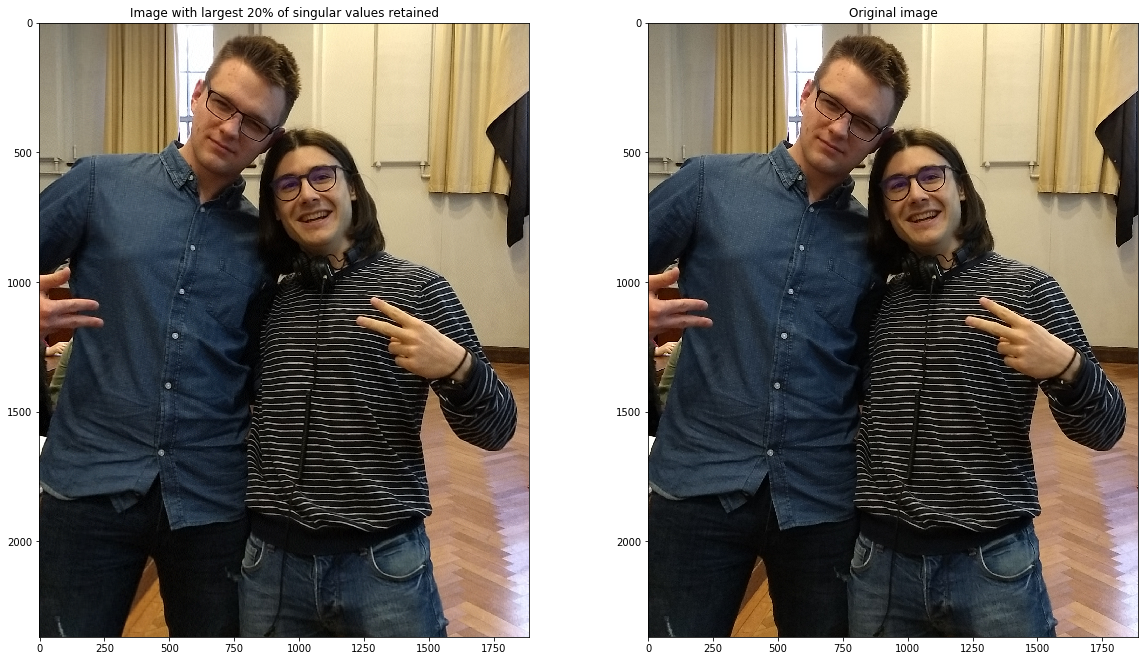

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Image with largest 20% of singular values retained')
axes[0].imshow(compressed, interpolation="nearest");
axes[1].set_title('Original image')
axes[1].imshow(img_colour);

Retaining 20% of the singular values for each colour, we can see some artifacts in the compressed image, which indicates that using the SVD for each colour independently is probably not a good idea.

### Colour image: YCbCr

A better approach is to split the image into [YCbCr](https://en.wikipedia.org/wiki/YCbCr), rather than RGB.
YCbCr is splits the image into luminance (Y), and chrominance (Cb and Cr) colour values.

In [21]:
img_colour_ycbcr = np.array(img_colour.convert("YCbCr"))

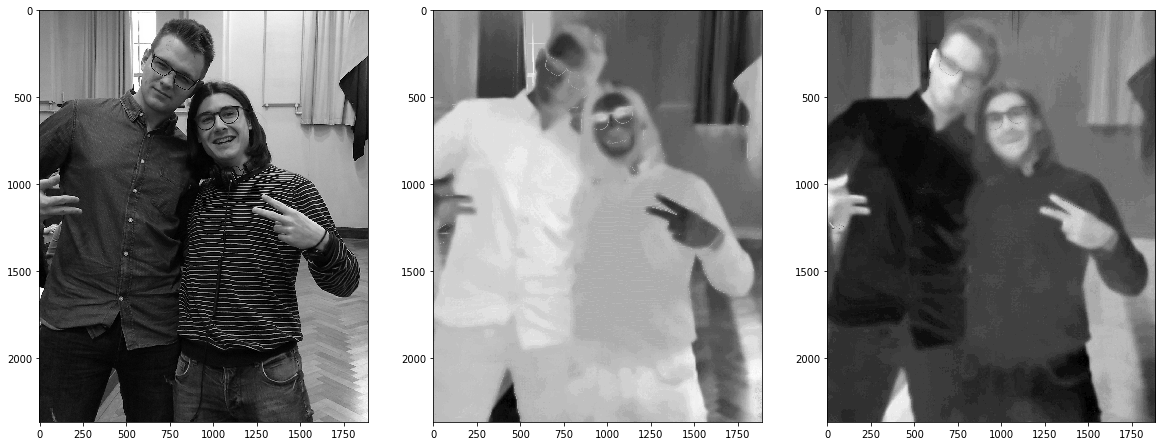

In [22]:
# Display Luminance(Y), Blue Chroma(Cb) and Red Chroma(Cr) channels
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20/1.77))

Y = img_colour_ycbcr[:,:,0]
axes[0].imshow(Y, cmap='gray');

Cb = img_colour_ycbcr[:,:,1]
axes[1].imshow(Cb, cmap='gray');

Cr = img_colour_ycbcr[:,:,2]
axes[2].imshow(Cr, cmap='gray');

Compute the SVD of each channel:

In [23]:
# Compute SVD for each channel
U, s, V = [0]*3, [0]*3, [0]*3
for i in range(3):
    U[i], s[i], V[i] = np.linalg.svd(img_colour_ycbcr[:, :, i], full_matrices=False)

Compress each channel, and display compressed channels in gray scale:

In [24]:
# Compress each component separately
compressed = [compress_image(U[0], s[0], V[0], 0.2),
              compress_image(U[1], s[1], V[1], 0.005),
              compress_image(U[2], s[2], V[2], 0.005)]
# Reconstruct 3D YCbCr array
compressed = np.dstack(compressed)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20/1.77))
Y = compressed[:,:,0]
axes[0].imshow(Y, cmap='gray');

Cb = compressed[:,:,1]
axes[1].imshow(Cb, cmap='gray');

Cr = compressed[:,:,2]
axes[2].imshow(Cr, cmap='gray');

Combine compressed channels:

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Image with largest 20% of brightness singular values retained and 0.5% colours')
im = Image.fromarray(np.uint8(compressed), mode="YCbCr")
axes[0].imshow(im)
axes[1].set_title('Original image')
axes[1].imshow(img_colour);

### Interactive compression

We'll now create an interactive image with sliders to interactively control the compression level.

In [26]:
from ipywidgets import widgets
from ipywidgets import interact

img = Image.open('./photo/IMG_20190117_141222563.png')

img_colour_ycbcr = np.array(img.convert("YCbCr"))

# Compute SVD for each channel
U0, s0, V0 = [0]*3, [0]*3, [0]*3
for i in range(3):
    U0[i], s0[i], V0[i] = np.linalg.svd(img_colour_ycbcr[:, :, i], full_matrices=False)

@interact(ratio_Y=(0.005, 0.4, 0.02), 
          ratio_Cb=(0.001, 0.1, 0.01), 
          ratio_Cr=(0.001, 0.1, 0.01))
def plot_image(ratio_Y=0.1, ratio_Cb=0.01, ratio_Cr=0.01):

    compressed = [compress_image(U0[0], s0[0], V0[0], ratio_Y),
                  compress_image(U0[1], s0[1], V0[1], ratio_Cb),
                  compress_image(U0[2], s0[2], V0[2], ratio_Cr)]

    # Reconstruct 3D YCbCr array
    compressed = np.dstack(compressed)    
    img_compressed = Image.fromarray(np.uint8(compressed), mode="YCbCr")

    # Show
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))

    axes[0].set_title('Compressed image')
    axes[0].imshow(img_compressed)

    axes[1].set_title('Original image')
    axes[1].imshow(img)

interactive(children=(FloatSlider(value=0.1, description='ratio_Y', max=0.4, min=0.005, step=0.02), FloatSlide…

## Effective rank

Determining the rank of a matrix is not a binary question in the context of floating point arithmetic or measurement errors. The SVD can be used to determine the 'effective rank' of a matrix. 

Consider the matrix:

In [27]:
A = np.array([[1, 1, 1], [2, 2, 2], [1, 0 ,1]])
print(A)

[[1 1 1]
 [2 2 2]
 [1 0 1]]


Clearly the first two rows are linearly dependent and the rank of this matrix is 2. We can verify this using NumPy:

In [28]:
print("Rank of A is: {}".format(np.linalg.matrix_rank(A)))

Rank of A is: 2


We now add some noise in the range $(0, 10^{-6})$ to the matrix entries:

In [29]:
np.random.seed(10)
A = A + 1.0e-6*np.random.rand(A.shape[0], A.shape[1])

We now test the rank:

In [30]:
print("Rank of A (with noise) is: {}".format(np.linalg.matrix_rank(A)))

Rank of A (with noise) is: 3


The problem is that we have a 'data set' that is linearly dependent, but this is being masked by very small measurement noise. 

Computing the SVD of the matrix with noise and printing the singular values:

In [31]:
U, s, V = np.linalg.svd(A)
print("The singular values of A (with noise) are: {}".format(s))

The singular values of A (with noise) are: [4.04844133e+00 7.81109622e-01 7.86339403e-08]


If we define the effective rank as the number of singular values that are greater than the noise level, the effective rank of $\boldsymbol{A}$ is 2.

## Rank deficient least-squares problems

For least squares problem, we have seen before that we solve

$$
\boldsymbol{A}^{T} \boldsymbol{A} \hat{\boldsymbol{x}} = \boldsymbol{A}^{T} \boldsymbol{b}
$$

or

$$
\begin{align}
\hat{\boldsymbol{x}} &= (\boldsymbol{A}^{T} \boldsymbol{A})^{-1} \boldsymbol{A}^{T} \boldsymbol{b}
\\
&= \boldsymbol{A}^{+}\boldsymbol{b}
\end{align}
$$

Everything is fine as long as $\boldsymbol{A}$ is full rank. The problem is that we might have data that leads to $\boldsymbol{A}$ not being full rank. For example, if we try to fit a polynomial in $x$ and $y$, but the data lies on a line. 

We have covered in the lectures how to handle least-squares problems that are rank deficient. Here we present an example.

### Example: fitting points in a two-dimensional space

Say we are given four data points that depend on $x$ and $y$, and we are asked to fit a polynomial of the form

$$
f(x, y) = c_{00} + c_{10}x + c_{01}y + c_{11}xy
$$

to the data points. Normally, we would expect to be able to fit the above polynomial to four data points by interpolation, i.e. solving $\boldsymbol{A} \boldsymbol{c} = \boldsymbol{f}$ where
$\boldsymbol{A}$ a square Vandermonde matrix. However, if the points happened to lie on a line, then $\boldsymbol{A}$ will be singular. If the points happen to almost lie on a line, then $\boldsymbol{A}$ will be close to singular. 

A possibility is to exclude zero or small singular values from the process, thereby finding a least-squares fit with minimal $\|\boldsymbol{c}\|_{2}$. We test this for the data set 

\begin{equation}
f_{1}(1, 0) = 3, \\
f_{2}(2, 0) = 5, \\
f_{3}(3, 0) = 7, \\
f_{4}(4, 0) = 9.
\end{equation}

The data lies on the line $y = 0$, and is in fact is linear in $x$.

We create arrays to hold this data, and visualise the points:

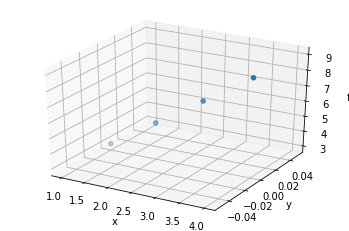

In [32]:
x, y, f = np.zeros(4), np.zeros(4), np.zeros(4)
x[0], y[0], f[0] = 1.0, 0.0, 3.0
x[1], y[1], f[1] = 2.0, 0.0, 5.0
x[2], y[2], f[2] = 3.0, 0.0, 7.0
x[3], y[3], f[3] = 4.0, 0.0, 9.0

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')
ax.scatter(x, y, f)
plt.show()

To find the polynomial coefficients we want to solve

\begin{equation}
\begin{bmatrix}
1 & x_{1} & y_{1} & x_{1}y_{1}  \\  
1 & x_{2} & y_{2} & x_{2}y_{2}  \\  
1 & x_{3} & y_{3} & x_{3}y_{3}  \\  
1 & x_{4} & y_{4} & x_{4}y_{4}  \\  
\end{bmatrix}
\begin{bmatrix}
c_{00} \\ c_{10} \\ c_{01} \\ c_{11}  
\end{bmatrix}
=
\begin{bmatrix}
f_{1} \\ f_{2} \\ f_{3} \\ f_{4}  
\end{bmatrix}
\end{equation}

where the matrix is the Vandermonde matrix. We can use a NumPy function to create the Vandermonde matrix:

In [33]:
A = np.polynomial.polynomial.polyvander2d(y, x, [1, 1])
print(A)

[[1. 1. 0. 0.]
 [1. 2. 0. 0.]
 [1. 3. 0. 0.]
 [1. 4. 0. 0.]]


It is clear by inspection that $\boldsymbol{A}$ is not full rank, and is rank 2.

Computing the SVD of $\boldsymbol{A}$ and printing the singular values:

In [34]:
U, s, V = np.linalg.svd(A)
print(s)

[5.77937881 0.77380911 0.         0.        ]


We can see that two of the singular values are zero. To find a least-squares fit to the data with minimal $\| \boldsymbol{c}\|_{2}$ we compute

$$
\hat{\boldsymbol{c}} = \boldsymbol{V}_{1} \boldsymbol{\Sigma}^{+} 
\boldsymbol{U}_{1}^{T}\boldsymbol{b}
$$

Creating $\boldsymbol{V}_{1}$,  $\boldsymbol{\Sigma}^{+}$ and $\boldsymbol{U}_{1}$ (recall that the NumPy SVD returns $\boldsymbol{V}^{T}$ rather than  $\boldsymbol{V}$): 

In [35]:
# Create view of U with last two columns removed 
U1 = U[:, :2]

# Create view of V with last two columns removed 
V1 = V[:2,:]

# Create Sigma^{+} by inverting the nonzero singular values and 
# discarding the zero singular values
S1 = np.diag(1.0/s[:-2])
print(S1)

[[0.17302898 0.        ]
 [0.         1.29230839]]


Computing the least-squares solution from $\hat{\boldsymbol{c}} = \boldsymbol{V}_{1} \boldsymbol{\Sigma}^{+} \boldsymbol{U}_{1}^{T}\boldsymbol{b}$:

In [36]:
c = np.transpose(V1).dot(S1.dot(U1.T).dot(f))
print(c)

[1. 2. 0. 0.]


The solution is $f(x, y) = 1 + 2x$, which in this case in fact interpolates the data points. Plotting the function, we have a plane that passes through the points.

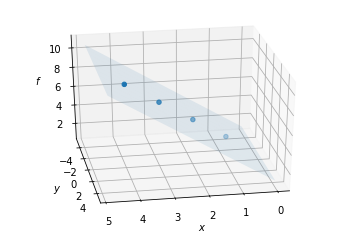

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f$')
ax.scatter(x, y, f)

# Plot surface
X = np.arange(0, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
Z = 1.0 + 2.0*X + 0.0*Y
surf = ax.plot_surface(X, Y, Z, rstride=5, cstride=5,  alpha=0.1)
ax.view_init(elev=30, azim=80)
plt.show()

We now try adding some noise to the sample positions and the measured values. The Vandermonde matrix is no longer singular so we can solve $\boldsymbol{A} \boldsymbol{c} = \boldsymbol{f}$ to get the polynomial coefficients:

In [38]:
np.random.seed(20)
xn = x + 1.0e-3*(1.0 - np.random.rand(len(x)))
yn = y + 1.0e-3*(1.0 - np.random.rand(len(y)))
fn = f + 1.0e-3*(1.0 - np.random.rand(len(f)))

A = np.polynomial.polynomial.polyvander2d(yn, xn, [1, 1])
c = np.linalg.solve(A, fn)
print(c)

[ 1.00365037  1.99853161 -5.16321091  2.40001974]


We now see significant coefficients for the $y$ and $xy$ terms in the interpolating polynomial just as a consequence of adding small amount of noise. Plotting the surface and the points, we see in dramatic impact of the noise.

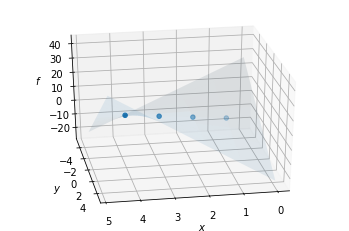

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f$')
ax.scatter(xn, yn, fn)

# Plot surface
X = np.arange(0, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
Z = c[0] + c[1]*X + c[2]*Y + c[3]*X*Y
surf = ax.plot_surface(X, Y, Z, rstride=5, cstride=5,  alpha=0.1)
ax.view_init(elev=30, azim=80)
plt.show()

Performing an SVD on the matrix with noise and printing the singular values:

In [40]:
U, s, V = np.linalg.svd(A)
print(s)

[5.77968248e+00 7.73716480e-01 7.62031514e-04 1.25062525e-04]


We see that two of the values are considerably small than the others. If we set these to zero and follow the least-squares procedure for rank-deficient problem:

In [41]:
# Create view of U with last two columns removed 
U1 = U[:, :2]

# Create view of V with last two columns removed 
V1 = V[:2,:]

# Create \Sigma^{+}
S1 = np.diag(1.0/s[:-2])

c = np.transpose(V1).dot(S1.dot(U1.T).dot(f))
print(c)

[9.99257206e-01 2.00013498e+00 6.49882602e-04 1.13588861e-03]


We see that the fitting polynomial is very close to the noise-free case.

## Principal component analysis 

Principal component analysis finds a transformation such that covariance of a data set is zero in the transformed directions, and the variance in these directions is greatest. From a dataset this tells us which are the 'important' parameters in a system.  

Consider taking $N = 200$ measurements of two quantities $x_{1}$ and $x_{2}$. We model the system by:

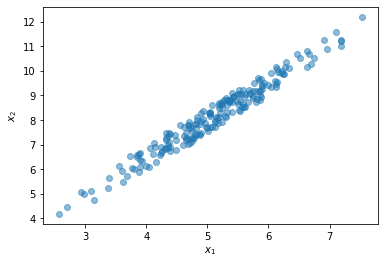

In [42]:
np.random.seed(1)
x0 = np.random.randn(200) + 5.0
x1 = 1.5*x0 + np.random.rand(len(x0))

ax = plt.axes()
ax.scatter(x0, x1, alpha=0.5);
ax.set_xlabel('$x_{1}$');
ax.set_ylabel('$x_{2}$');

We collect the data in a $200 \times 2$ matrix $\boldsymbol{X}$ (200 measurements, 2 variables):

In [43]:
X = np.column_stack((x0, x1))

We can compute the covariance matrix $\boldsymbol{C}$ by making the columns of $\boldsymbol{X}$ zero mean and computing $\boldsymbol{X}^{T}\boldsymbol{X}^{T}/(N-1)$

In [44]:
for c in range(X.shape[1]):
    X[:,c] = X[:,c] - np.mean(X[:,c])
C = (X.T).dot(X)/(len(x0)-1.0)

The covariance matrix is square and symmetric, so w can diagonalise it by computing the eigenvalues and eigenvectors.

We could also compute the SVD of $\boldsymbol{X}$ since the $\boldsymbol{V}$ is made of the eigenvectors of $\boldsymbol{X}^{T}\boldsymbol{X}^{T}$:

In [45]:
U, s, V = np.linalg.svd(C)
print(s)

[2.86471197 0.02380521]


Plotting the data set and the principal directions:

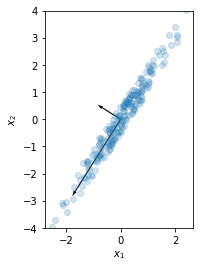

In [46]:
ax = plt.axes()
ax.set_aspect(1.0);
ax.set_ylim(-4.0, 4.0);
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.quiver(V[0, 0], V[0, 1], angles='xy',scale_units='xy',scale=0.3);
ax.quiver(V[1, 0], V[1, 1], angles='xy',scale_units='xy',scale=1);
ax.scatter(X[:,0], X[:,1], alpha=0.2);

PCA effectively detects correlation in a data set. In the above example it suggest that the system could be modelled with one variable in the direction of the first column of $\boldsymbol{V}$.